In [1]:
import pandas as pd
import numpy as np
# V.V.I=> matplotlib 'inline' dile.. pop-up window open hoy na!
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns       

In [3]:
url = "Cartwheeldata-Copy1.csv"
df = pd.read_csv(url)
x = len(df.columns)
print(x)
x = 8
pd.set_option('display.max_columns', x)  #V.V.I. => How many columns we have to show, specify here the value 'x'
df.head()

12


,ID,Age,Gender,GenderGroup,...,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,...,79,Y,1,7
1,2,26,F,1,...,70,Y,1,8
2,3,33,F,1,...,85,Y,1,7
3,4,39,F,1,...,87,Y,1,10
4,5,27,M,2,...,72,N,0,4


In [3]:
df.columns
keep = [column for column in df.columns if 'Gen' in column]
df[keep].head(10)

,Gender,GenderGroup
0,F,1
1,F,1
2,F,1
3,F,1
4,M,2
5,M,2
6,M,2
7,F,1
8,M,2
9,F,1


In [5]:
print( df.columns )
print( len(df.columns) )
print( df.columns.dtype )
print( df[0:3], "\n==>\n", df[['Age', 'Height', 'Score']] )

Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object')
12
object
   ID  Age Gender  GenderGroup Glasses  GlassesGroup  Height  Wingspan  \
0   1   56      F            1       Y             1    62.0      61.0   
1   2   26      F            1       Y             1    62.0      60.0   
2   3   33      F            1       Y             1    66.0      64.0   

   CWDistance Complete  CompleteGroup  Score  
0          79        Y              1      7  
1          70        Y              1      8  
2          85        Y              1      7   
==>
     Age  Height  Score
0    56   62.00      7
1    26   62.00      8
2    33   66.00      7
3    39   64.00     10
4    27   73.00      4
5    24   75.00      3
6    28   75.00     10
7    22   65.00      9
8    29   74.00      5
9    33   63.00      8
10   30   69.50      6
11   28   62.75     10
12   25   65.00  

In [4]:
df.dtypes

ID                 int64
Age                int64
Gender            object
GenderGroup        int64
Glasses           object
GlassesGroup       int64
Height           float64
Wingspan         float64
CWDistance         int64
Complete          object
CompleteGroup      int64
Score              int64
dtype: object

In [6]:
print(df.shape)
# List unique values in the df['Gender'] column
df.Gender.unique()

(25, 12)


array(['F', 'M'], dtype=object)

In [7]:
df.groupby(['Gender']).size()
df.groupby(['Gender','GenderGroup']).size() # same ashbe..

Gender  GenderGroup
F       1              12
M       2              13
dtype: int64

In [8]:
print(df.columns)
print(df.dtypes)
print(df.Age.value_counts()) # OR
print(df['Age'].value_counts())

Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object')
ID                 int64
Age                int64
Gender            object
GenderGroup        int64
Glasses           object
GlassesGroup       int64
Height           float64
Wingspan         float64
CWDistance         int64
Complete          object
CompleteGroup      int64
Score              int64
dtype: object
26    4
23    4
24    2
29    2
28    2
27    2
25    2
33    2
31    1
56    1
22    1
30    1
39    1
Name: Age, dtype: int64
26    4
23    4
24    2
29    2
28    2
27    2
25    2
33    2
31    1
56    1
22    1
30    1
39    1
Name: Age, dtype: int64


## Geting 'specific portions of data' OR 'specific records'
###### .loc[] for using label/column based,  & .iloc[] for using index of columns N.B. 'i' for index

In [9]:
# df[2:5, ['Age', 'Height']]  V.V.I. -- It's invalid statement for dataFrame
# We have to use .loc[], .iloc[]    
df.loc[2:5, ['Age', 'Height']]

,Age,Height
2,33,66.0
3,39,64.0
4,27,73.0
5,24,75.0


In [4]:
#Hence, we find index of a column so, we've to use "df.columns"
print(df.columns.isin(['Age','Height'])) #Boolean list
print(df.columns.get_loc('Age') , df.columns.get_loc('Height'))

[False  True False False False False  True False False False False False]
1 6


########## V.V.I. => iloc/loc -- using "boolean array" (which is used in train/test split) ############

In [20]:
traintestsplit = np.random.rand(len(df)) < 0.8
train = df[traintestsplit]
print(~traintestsplit)
test = df[~traintestsplit]
test.loc[:, ['Age', 'Height']]

[False False False False False  True False False False False False False
 False False False False False False False  True False  True False False
 False]


,Age,Height
5,24,75.0
19,24,68.0
21,29,71.0


## V.V.I. => to fit data, we have to convert pandas dataFrame to numpy array (nd-array)

In [4]:
df.columns

Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object')

In [5]:
##Suppose: we will use here the 5 features to fit model which are: 'Age', 'Gender', 'Glasses', 'Height', 'CWDistance', And the target/goal attribute is y = "Score"
X = df[['Age', 'Gender', 'Glasses', 'Height', 'CWDistance']].values
print(X[0:5])
features = np.asanyarray(df.loc[:, ['Age', 'Gender', 'Glasses', 'Height', 'CWDistance']])
print(features[0:5]) #V.V.I => X == features
#But the pandas output will be:
print(df.loc[:, ['Age', 'Gender', 'Glasses', 'Height', 'CWDistance']].head(5)) #V.V.I. => for computation, we need array

[[56 'F' 'Y' 62.0 79]
 [26 'F' 'Y' 62.0 70]
 [33 'F' 'Y' 66.0 85]
 [39 'F' 'N' 64.0 87]
 [27 'M' 'N' 73.0 72]]
[[56 'F' 'Y' 62.0 79]
 [26 'F' 'Y' 62.0 70]
 [33 'F' 'Y' 66.0 85]
 [39 'F' 'N' 64.0 87]
 [27 'M' 'N' 73.0 72]]
   Age Gender Glasses  Height  CWDistance
0   56      F       Y    62.0          79
1   26      F       Y    62.0          70
2   33      F       Y    66.0          85
3   39      F       N    64.0          87
4   27      M       N    73.0          72


## V.V.I. => categorical data to numerical data conversion

In [6]:
from sklearn import preprocessing
gender = preprocessing.LabelEncoder()
gender.fit(['F','M'])
X[:,1] = gender.transform(X[:,1]) 

glasses = preprocessing.LabelEncoder()
glasses.fit(['Y', 'N'])
X[:, 2] = glasses.transform(X[:, 2])
X[0:5]

array([[56, 0, 1, 62.0, 79],
       [26, 0, 1, 62.0, 70],
       [33, 0, 1, 66.0, 85],
       [39, 0, 0, 64.0, 87],
       [27, 1, 0, 73.0, 72]], dtype=object)

############## V.V.I. => Column based 'boolean array'-- used in instead of direct use of labels #############

In [25]:
col_bol = df.columns.isin(['Age', 'Height'])
print(col_bol) # V.V.I. => As total columns are '12', so- here we get a 12 size boolean array, where the "Age" & "Height" positions will 'True' and the others will 'False'
df.loc[:9, col_bol]

[False  True False False False False  True False False False False False]


,Age,Height
0,56,62.0
1,26,62.0
2,33,66.0
3,39,64.0
4,27,73.0
5,24,75.0
6,28,75.0
7,22,65.0
8,29,74.0
9,33,63.0


In [11]:
df.iloc[2:5, [1,6]]

,Age,Height
2,33,66.0
3,39,64.0
4,27,73.0


In [12]:
#dropna() means --- drop all null atrribute-values
df.Age.dropna().describe()

count    25.000000
mean     28.240000
std       6.989754
min      22.000000
25%      24.000000
50%      26.000000
75%      29.000000
max      56.000000
Name: Age, dtype: float64

In [18]:
#OR, using numpy :-
ages = df.Age.dropna()
print( np.mean(ages) ) #or, ages.mean()
print( ages.mean() ) #Pandas function

print( np.percentile(ages, 50) )
print( ages.quantile(.75) ) #Pandas function

print( np.percentile(ages, 5) )
print( ages.quantile(.05) ) #Pandas function


28.24
28.24
26.0
29.0
23.0
23.0


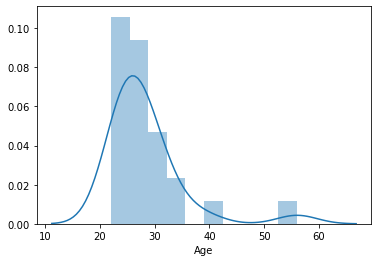

In [21]:
sns.distplot(ages) #distplot means distribution plot

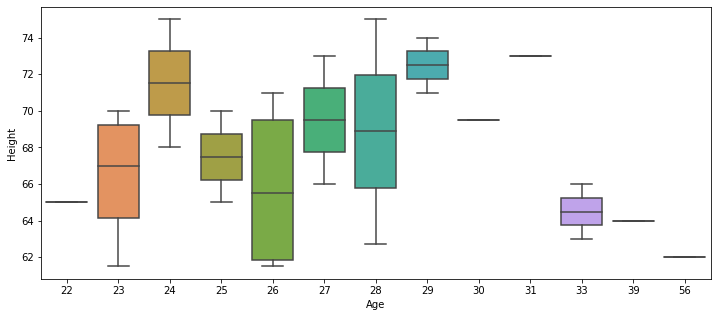

In [22]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Age', y='Height', data=df)

In [23]:
df.columns
df.Age.value_counts()
#Assign each unique Age: a name
df['Age'] = df.Age.replace({26:'1st highest-frequency-age', 23:'1st highest-frequency-age', 24:'2nd highest-frequency-age', 29:'2nd highest-frequency-age', 28:'2nd highest-frequency-age', 27:'2nd highest-frequency-age', 25:'2nd highest-frequency-age', 33:'2nd highest-frequency-age', 31:'3rd highest-frequency-age', 56:'3rd highest-frequency-age', 22:'3rd highest-frequency-age', 30:'3rd highest-frequency-age', 39:'3rd highest-frequency-age'})

In [24]:
df.loc[:9, ['ID', 'Gender', 'Age', 'Height']]

,ID,Gender,Age,Height
0,1,F,3rd highest-frequency-age,62.0
1,2,F,1st highest-frequency-age,62.0
2,3,F,2nd highest-frequency-age,66.0
3,4,F,3rd highest-frequency-age,64.0
4,5,M,2nd highest-frequency-age,73.0
5,6,M,2nd highest-frequency-age,75.0
6,7,M,2nd highest-frequency-age,75.0
7,8,F,3rd highest-frequency-age,65.0
8,9,M,2nd highest-frequency-age,74.0
9,10,F,2nd highest-frequency-age,63.0


In [3]:
url = 'nhanes_2015_2016-Copy1.csv'
da = pd.read_csv(url)

In [4]:
    da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [1]:
### Stratification (স্তরীকরণ/বিন্যাস)

'V.V.I.=> One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these "strata" on its own.  We can then formally or informally compare the findings in the different strata.  When working with human subjects, it is very common to stratify on demographic factors such as age, sex, and race.'


'V.V.I.=> One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these "strata" on its own.  We can then formally or informally compare the findings in the different strata.  When working with human subjects, it is very common to stratify on demographic factors such as age, sex, and race.'

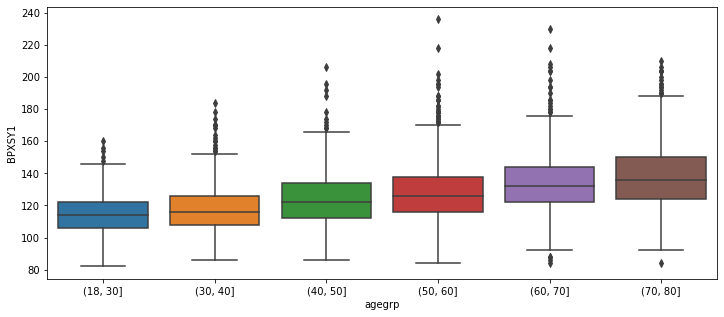

In [8]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x="agegrp", y="BPXSY1", data=da)  # Make boxplot of BPXSY1 stratified by age group

In [10]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

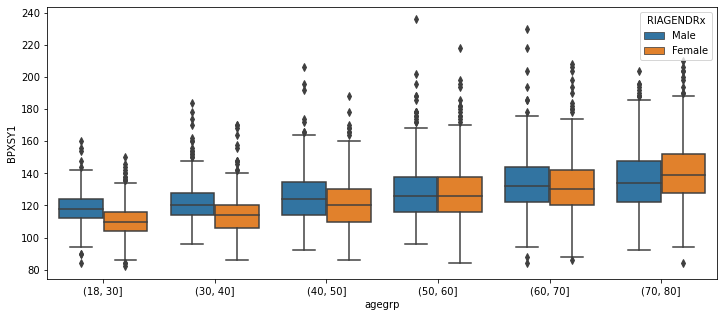

In [11]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp", y="BPXSY1", hue="RIAGENDRx", data=da)

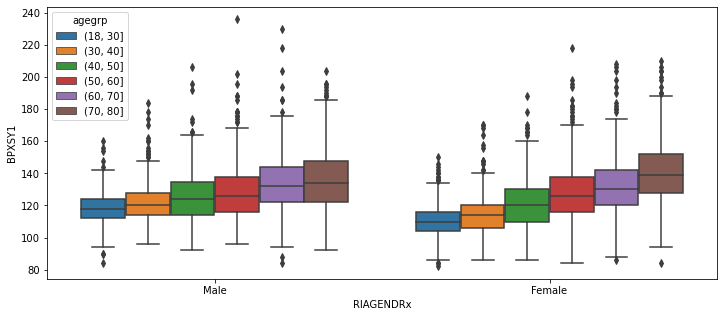

In [12]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=da)